# 深度學習_女裝配件辨識
Tensorflow官網提供程式碼與資料集   
[資料集](https://medium.com/tensorflow/hello-deep-learning-fashion-mnist-with-keras-50fcff8cd74a)  
[作法參考](https://ithelp.ithome.com.tw/articles/10233758)

資料集類別描述:  
0 T-shirt/top  
1 Trouser  
2 Pullover  
3 Dress  
4 Coat  
5 Sandal  
6 Shirt  
7 Sneaker  
8 Bag  
9 Ankle boot

## 一、載入資料並分割

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

#載入資料集mnist，並執行切割
ds = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train),(x_test, y_test) = ds
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

X訓練資料 -> 6萬筆圖片(28*28pix)， y訓練資料 -> 6萬筆答案

X測試資料 -> 1萬筆圖片(28*28pix)， y測試資料 -> 1萬筆答案

訓練資料第2筆，標記為-T袖/上衣(0)-


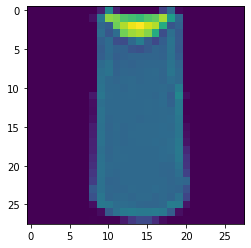

In [3]:
# Define the text labels
fashion_mnist_labels = ["T袖/上衣",   # index 0
                        "長褲",       # index 1
                        "套頭衫",     # index 2 
                        "洋裝",       # index 3 
                        "外套",       # index 4
                        "涼鞋",       # index 5
                        "襯衫",       # index 6 
                        "運動鞋",     # index 7 
                        "皮包",       # index 8 
                        "短靴"]       # index 9
img_index = 2
lab_index = y_train[img_index]
print(f'訓練資料第{img_index}筆，標記為-{fashion_mnist_labels[lab_index]}({lab_index})-')
plt.imshow(x_train[img_index])

In [4]:
# 顯示前10筆y_train
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

## 二、特徵工程

In [6]:
#特徵工程: (X-min)/(255-0)常態化
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

# 顯示第一筆資料
# x_train_norm[0]

## 三、訓練模型

In [6]:
#套入模型: Deep Learning
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])

In [7]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) #隨機梯度下降，註解3
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
#訓練
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 1s 873us/step - loss: 0.5938 - accuracy: 0.7896 - val_loss: 0.4362 - val_accuracy: 0.8447
Epoch 2/10
1500/1500 [==============================] - 1s 750us/step - loss: 0.4389 - accuracy: 0.8414 - val_loss: 0.4248 - val_accuracy: 0.8388
Epoch 3/10
1500/1500 [==============================] - 1s 754us/step - loss: 0.3993 - accuracy: 0.8546 - val_loss: 0.3820 - val_accuracy: 0.8625
Epoch 4/10
1500/1500 [==============================] - 1s 749us/step - loss: 0.3762 - accuracy: 0.8623 - val_loss: 0.4052 - val_accuracy: 0.8533
Epoch 5/10
1500/1500 [==============================] - 1s 751us/step - loss: 0.3608 - accuracy: 0.8676 - val_loss: 0.3583 - val_accuracy: 0.8723
Epoch 6/10
1500/1500 [==============================] - 1s 748us/step - loss: 0.3472 - accuracy: 0.8720 - val_loss: 0.3548 - val_accuracy: 0.8728
Epoch 7/10
1500/1500 [==============================] - 1s 798us/step - loss: 0.3387 - accuracy: 0.8751 - val_loss: 0.3449 -

## 四、評估

In [9]:
# 評估，打分數
score=model.evaluate(x_test_norm, y_test, verbose=0)
score

[0.36040425300598145, 0.8708000183105469]

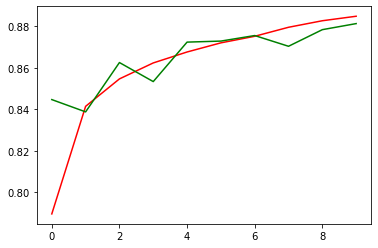

In [10]:
# 對訓練過程的準確度繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], 'r')
plt.plot(history.history['val_accuracy'], 'g')

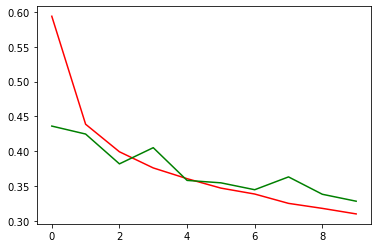

In [11]:
# 對訓練過程的損失函數繪圖
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], 'r')
plt.plot(history.history['val_loss'], 'g')

In [12]:
predictions = model.predict_classes(x_test_norm)
# get prediction result
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
prediction: [9 2 1 1 6 1 4 6 5 7 4 5 5 3 4 1 2 2 8 0]
actual    : [9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0]


In [13]:
# 顯示模型的彙總資訊
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 實物測試 
利用Windows圖形介面，透過拖曳，取得圖片檔，顯示並使用已訓練好模型進行預測，並顯示  

為了可以拖曳圖片後，顯示影像需安裝以下2個套件  

pip install windnd

pip install pillow

In [ ]:
# 在CMD下安裝 pip install windnd與pip install pillow
import tkinter as tk
from tkinter.messagebox import showinfo
import windnd
from PIL import Image, ImageTk
from skimage import io
from skimage.transform import resize
import numpy as np

def dragged_files(files):
    #取得檔案路徑(只能取英文路徑)
    msg = '\n'.join((item.decode('gbk') for item in files))
    
    #顯示圖片
    im = Image.open(msg) #只能辨識英文路徑
    img = ImageTk.PhotoImage(im)
    img_lab.config(image=img)
    img_lab.image = img
    img_lab.pack()
    
    #進行預測
    image1 = io.imread(msg, as_gray=True)
    image_resized = resize(image1, (28, 28), anti_aliasing=True)    
    X1 = image_resized.reshape(1, 28, 28) #/ 255
    X1 = np.abs(1-X1)
    predictions = model.predict_classes(X1)
    
    #顯示影像與圖片
    print(fashion_mnist_labels[int(predictions)])   
    print(predictions)
    plt.imshow(X1.reshape(28,28))
    plt.show() 
    
    #顯示預測值
    strVar.set(f'該圖片為- {fashion_mnist_labels[int(predictions)]} -')
    
window = tk.Tk()
window.geometry('300x320')
window.title('圖片辨識')

#顯示答案
strVar = tk.StringVar()  #建立可更改Label之變數
strVar.set("  ")
resultLab = tk.Label(window,
                     textvariable = strVar,
                     font = ('Arial', 12),
                     width = 30, height = 2)
resultLab.pack()

#圖檔frame
textImg = tk.StringVar()
textImg.set('請拖曳圖片到此，進行辨識')
img_lab = tk.Label(window,
                    textvariable = textImg,
                    font = ('Arial', 12),
                    width = 300, height = 300)
img_lab.pack()

windnd.hook_dropfiles(window, func=dragged_files)
window.mainloop()

**執行結果**
<img src="https://github.com/Yi-Huei/bin/blob/master/images/DL_Clothes.png?raw=true" style="zoom:60%" />

**結論:準確度為86.61%，並不高，且測試後出錯也不少**

## 完整程式碼

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist

ds = tf.keras.datasets.fashion_mnist.load_data()
(x_train, y_train),(x_test, y_test) = ds

# labels
fashion_mnist_labels = ["T袖/上衣",   # index 0
                        "長褲",       # index 1
                        "套頭衫",     # index 2 
                        "洋裝",       # index 3 
                        "外套",       # index 4
                        "涼鞋",       # index 5
                        "襯衫",       # index 6 
                        "運動鞋",     # index 7 
                        "皮包",       # index 8 
                        "短靴"]       # index 9

x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0

#模型: Deep Learning
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  #圖片28*28pix，input為這784
  tf.keras.layers.Dense(128, activation='relu'),  #Dense為連結層，128個神經元
  tf.keras.layers.Dropout(0.2),                   #訓練過程中隨機丟棄20%神經元
  tf.keras.layers.Dense(10, activation='softmax') #結果0~9，10個結果
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.1) 
model.compile(optimizer=optimizer, #'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train_norm, y_train, epochs=10, validation_split=0.2)
score=model.evaluate(x_test_norm, y_test, verbose=0)
print(score)

predictions = model.predict_classes(x_test_norm)
print('prediction:', predictions[0:20])
print('actual    :', y_test[0:20])